In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#მოდულების იმპორტი

In [5]:
conn = sqlite3.connect('letterboxd.sqlite')
cursor = conn.cursor()
df = pd.read_sql_query('SELECT * FROM "Letterbox Movie Classification Dataset"', conn)
print(df)
 #მონაცემთა ბაზასთან დაკავშირება და ჩვენებბა 

        field1           Film_title            Director  Average_rating  \
0          0.0              The Fan     Eckhart Schmidt            3.57   
1          1.0   Mad Max: Fury Road       George Miller            4.18   
2          3.0  Lost in Translation       Sofia Coppola            3.79   
3          4.0                Akira     Katsuhiro Otomo            4.28   
4          5.0       Things to Come     Mia Hansen-Løve            3.77   
...        ...                  ...                 ...             ...   
9997   10001.0             Roujin Z   Hiroyuki Kitakubo            3.59   
9998       NaN         Maita nasosi                   ?             NaN   
9999       NaN         Moita Nasosi     Soso Jachvliani             NaN   
10000      NaN         4th Brighton   Levan Koguashvili            3.50   
10001      NaN         4th Brighton  Levan Koghuashvili            3.50   

                                           Genres  Runtime Original_language  \
0                  

In [6]:
# კონკრეტული ფილმების მოძებნა: ფილმები რომელთა ხანგძლივობაც სამ საათზე მეტია , რომელთაც აქვთ 1000000-ზე მეტი რეიტინგი და 4ზე მაღალი საშუალო შეფასება

query = 'SELECT Film_title, Genres, Director , Average_rating , Runtime FROM "Letterbox Movie Classification Dataset" WHERE Total_ratings > 100000 AND Runtime > 180 AND Average_rating > 4'

# ერთი ჩანაწერის წამოღება
cursor.execute(query)
result_one = cursor.fetchone()
print("პირველი ჩანაწერი:")
print(result_one)
print("________________________")

# პირველი 5 ჩანაწერი
cursor.execute(query)
result_five = cursor.fetchmany(5)

print("5 ჩანაწერი:")
for row in result_five:
    print(row)
print("__________________________")

# ყველა ჩანაწერი
cursor.execute(query)
result_all = cursor.fetchall()
print("ყველა ჩანაწერი:")
for row in result_all:
    print(row)



პირველი ჩანაწერი:
('Lawrence of Arabia', "['Adventure', 'War', 'History']", 'David Lean', 4.38, 228.0)
________________________
5 ჩანაწერი:
('Lawrence of Arabia', "['Adventure', 'War', 'History']", 'David Lean', 4.38, 228.0)
('Magnolia', "['Drama']", 'Paul Thomas Anderson', 4.22, 189.0)
('The Godfather Part II', "['Crime', 'Drama']", 'Francis Ford Coppola', 4.59, 202.0)
('Barry Lyndon', "['Drama', 'History', 'War', 'Romance']", 'Stanley Kubrick', 4.4, 185.0)
('Malcolm X', "['History', 'Drama']", 'Spike Lee', 4.25, 202.0)
__________________________
ყველა ჩანაწერი:
('Lawrence of Arabia', "['Adventure', 'War', 'History']", 'David Lean', 4.38, 228.0)
('Magnolia', "['Drama']", 'Paul Thomas Anderson', 4.22, 189.0)
('The Godfather Part II', "['Crime', 'Drama']", 'Francis Ford Coppola', 4.59, 202.0)
('Barry Lyndon', "['Drama', 'History', 'War', 'Romance']", 'Stanley Kubrick', 4.4, 185.0)
('Malcolm X', "['History', 'Drama']", 'Spike Lee', 4.25, 202.0)
('Once Upon a Time in America', "['Crime', 

In [8]:
#მომხმარებლის მიერ ახალი ფილმის დამატება

title = input("შეიყვანე ახალი ფილმის სახელი: ")
genre = input("შეიყვანე ჟანრი: ")
director = input("შეიყვანე რეჟისორი: ")
rating = input("შეიყვანე რეიტინგი: ")
runtime = input("შეიყვანე ხანგძლივობა: ")
language = input("შეიყვანე ორიგინალი ენა: ")
description = input("შეიყვანეთ  აღწერა: ")
studio = input("შეიყვანეთ სტუდია: ")



cursor.execute('INSERT INTO "Letterbox Movie Classification Dataset" (Film_title, Genres, Director, Average_rating, Runtime,  Original_language, Description, Studios) VALUES (?, ?, ?, ?, ?, ?, ?, ?)', (title, genre, director, rating, runtime, language, description, studio))
conn.commit()
print("ახალი ფილმი წარმატებით დაემატა")



შეიყვანე ახალი ფილმის სახელი:  4th Brighton
შეიყვანე ჟანრი:  Crama
შეიყვანე რეჟისორი:  Levan Kegoashvili
შეიყვანე რეიტინგი:  3.5
შეიყვანე ხანგძლივობა:  96
შეიყვანე ორიგინალი ენა:  Georgian
შეიყვანეთ  აღწერა:  A former wrestler travels from Georgia to a Russian-speaking neighborhood in Brooklyn, N.Y., to visit his hapless son in a shabby boarding house. He soon does everything in his power to help him get out of a $14,000 gambling debt to a local mob boss.
შეიყვანეთ სტუდია:  Studio Iberica


ახალი ფილმი წარმატებით დაემატა


In [11]:

# მომხმარებლის მიერ ფილმის კონკრეტული დეტალების განახლება
title_to_update = input("შეიყვანე გასანახლებელი ფილმის სახელი: ")
new_genre = input("შეიყვანე ახალი ჟანრი: ")
new_director = input("შეიყვანე ახალი რეჟისორი: ")
new_rating = input("შეიყვანე ახალი რეიტინგი: ")
new_runtime = input("შეიყვანე ახალი ხანგძლივობა: ")
new_language = input("შეიყვანე ახალი ორიგინალი ენა: ")
new_description = input("შეიყვანე ახალი აღწერა: ")
new_studio = input("შეიყვანე ახალი სტუდია: ")

# ბაზაში ჩანაწერის განახლება
cursor.execute("""
    UPDATE "Letterbox Movie Classification Dataset" 
    SET Genres=?, Director=?, Average_rating=?, Runtime=?, Original_language=?, Description=?, Studios=?
    WHERE Film_title=?
""", (new_genre, new_director, new_rating, new_runtime, new_language, new_description, new_studio, title_to_update))

# ცვლილებების შენახვა ბაზში
conn.commit()
print("განახლება დასრულდა")



შეიყვანე გასანახლებელი ფილმის სახელი:  Barbie
შეიყვანე ახალი ჟანრი:  Horror
შეიყვანე ახალი რეჟისორი:  James Wan
შეიყვანე ახალი რეიტინგი:  5
შეიყვანე ახალი ხანგძლივობა:  90
შეიყვანე ახალი ორიგინალი ენა:  Yapannese
შეიყვანე ახალი აღწერა:  Barbie set in a haunted house
შეიყვანე ახალი სტუდია:  Warner Bros


განახლება დასრულდა


In [12]:
 # მონაცემის წაშლა
delete_title = input("შეიყვანე წასაშლელი ფილმის სახელი: ")

cursor.execute('''DELETE FROM "Letterbox Movie Classification Dataset" WHERE Film_title=?''', (delete_title,))

conn.commit()
print("ჩანაწერი წარმატებით წაიშალა!")

შეიყვანე წასაშლელი ფილმის სახელი:  Barbie


ჩანაწერი წარმატებით წაიშალა!


In [14]:
 #გამოთვლები

# ჟანრის მიხედვით რამდენი ფილმია
def count_by_genre(genre):
    res = cursor.execute('SELECT COUNT(*) FROM "Letterbox Movie Classification Dataset" WHERE Genres=?', (genre,))
    return res.fetchone()[0]

# კონკრეტული რეჟისორის ფილმების რაოდენობა
def count_by_director(director):
    res = cursor.execute('SELECT COUNT(*) FROM "Letterbox Movie Classification Dataset" WHERE Director=?', (director,))
    return res.fetchone()[0]

# კონკრეტული ენის ფილმების რაოდენობა
def count_by_language(language):
    res = cursor.execute('SELECT COUNT(*) FROM "Letterbox Movie Classification Dataset" WHERE Original_language=?', (language,))
    return res.fetchone()[0]

# ფილმების ჯამური ხანგრძლივობა კონკრეტული ჟანრის მიხედვით
def total_runtime_by_genre(genre):
    res = cursor.execute('SELECT SUM(Runtime) FROM "Letterbox Movie Classification Dataset" WHERE Genres=?', (genre,))
    return res.fetchone()[0]

# ფილმების საშუალო რეიტინგი მოცემული რეჟისორის მიხედვით
def average_rating_by_director(director):
    res = cursor.execute('SELECT AVG(Average_rating) FROM "Letterbox Movie Classification Dataset" WHERE Director=?', (director,))
    return res.fetchone()[0]


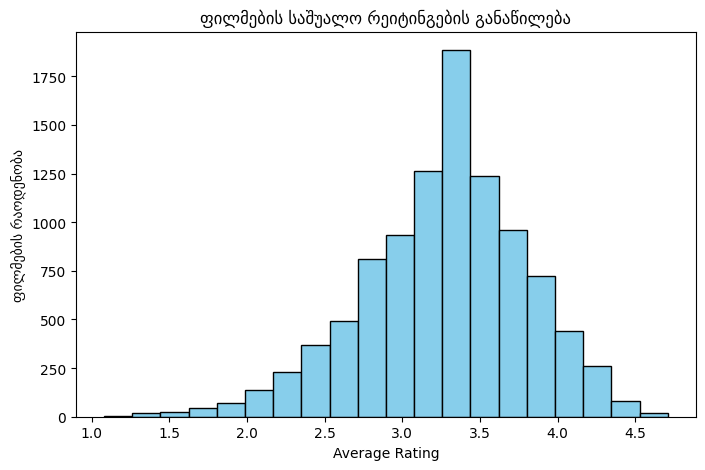

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(df['Average_rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('ფილმების საშუალო რეიტინგების განაწილება')
plt.xlabel('Average Rating')
plt.ylabel('ფილმების რაოდენობა')
plt.show()

 #ჰისტოგრამა: Average Rating განაწილება


/var/folders/_n/851p76791txd8fslxmj6hc7m0000gn/T/ipykernel_20552/2295956225.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_directors, x="High_Rating_Films", y="Director", palette="mako")


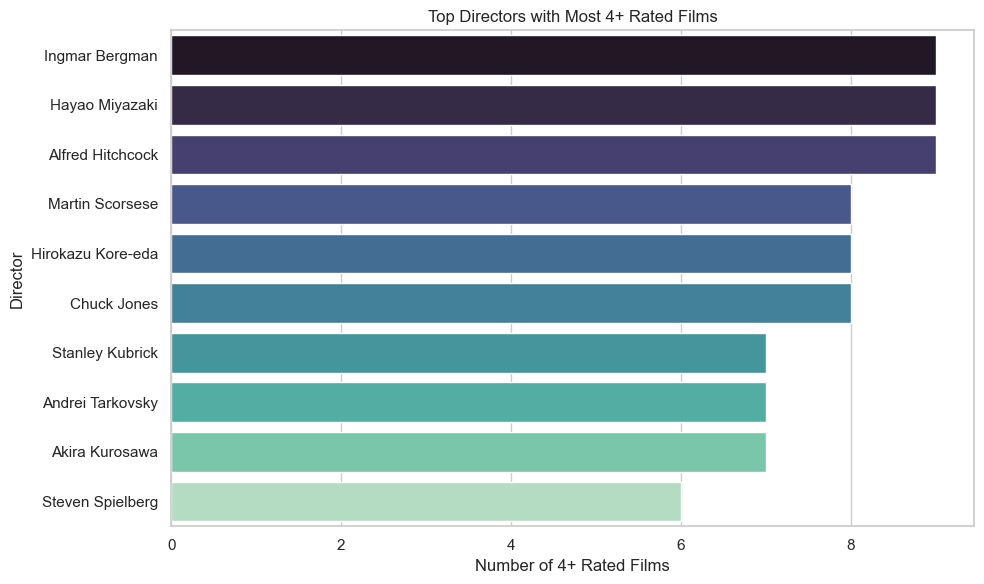

In [34]:
query = '''SELECT Director, COUNT(*) AS High_Rating_Films FROM "Letterbox Movie Classification Dataset" WHERE Average_rating > 4 AND Director IS NOT NULL
GROUP BY Director
ORDER BY High_Rating_Films DESC
LIMIT 12
'''
plt.figure(figsize=(10,6))
sns.barplot(data=df_directors, x="High_Rating_Films", y="Director", palette="mako")
plt.title('Top Directors with Most 4+ Rated Films')
plt.xlabel('Number of 4+ Rated Films')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

     # რეჟისორები ყველაზე მეტი 4+ საშუალო რეიტინგის მქონე ფილმებით


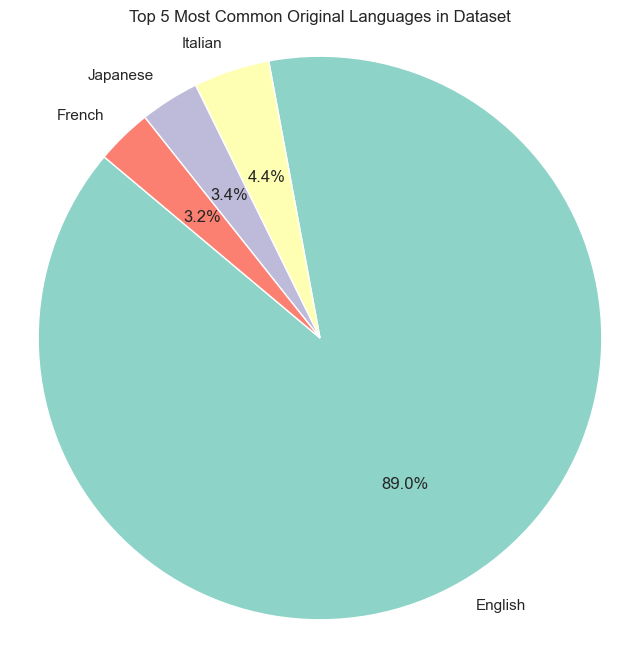

In [38]:
query = '''SELECT Original_language, COUNT(*) as Film_Count FROM "Letterbox Movie Classification Dataset" WHERE Original_language IS NOT NULL GROUP BY Original_language
ORDER BY Film_Count DESC LIMIT 4'''

df_languages = pd.read_sql_query(query, conn)

plt.figure(figsize=(8,8))
plt.pie(df_languages['Film_Count'], labels=df_languages['Original_language'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Most Common Original Languages in Dataset')
plt.axis('equal') 
plt.show()

    #ყველაზე გავრცელებული ფილმთა ენები დატასეტში


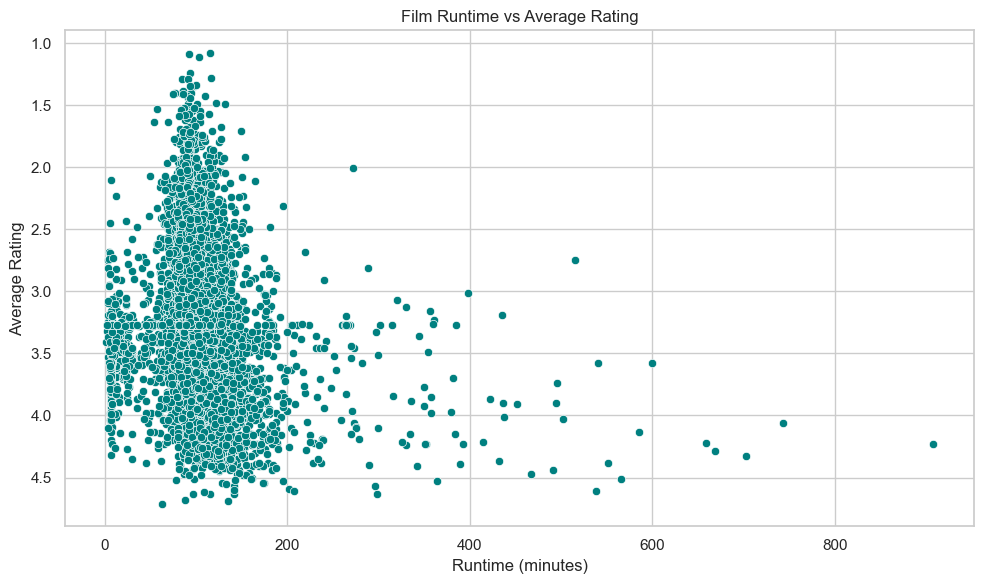

In [36]:
conn = sqlite3.connect('letterboxd.sqlite')
cursor = conn.cursor()


query = '''SELECT Average_rating, Runtime FROM "Letterbox Movie Classification Dataset" '''

df_scatter = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_scatter, x='Runtime', y='Average_rating', color='teal')
plt.title('Film Runtime vs Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

     #Scatter Plot - საშუალო რეიტინგისა და ხანგძლივობის კავშირი

In [39]:
#მონაცემთა ბაზასთან კავშირის დახურვა
conn.close()